Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %config InlineBackend.figure_format='retina'

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([         u'caseid',         u'rscrinf',        u'rdormres',
              u'rostscrn',     u'rscreenhisp',     u'rscreenrace',
                 u'age_a',           u'age_r',         u'cmbirth',
               u'agescrn', 
       ...
            u'pubassis_i',         u'basewgt', u'adj_mod_basewgt',
              u'finalwgt',          u'secu_r',            u'sest',
               u'cmintvw',         u'cmlstyr',      u'screentime',
             u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [3]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)

Display the histogram.

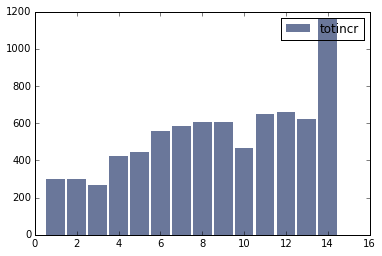

In [4]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

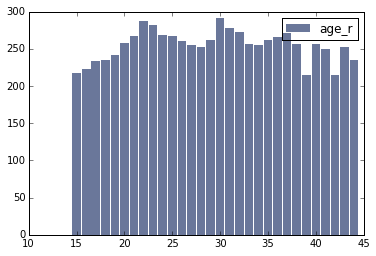

In [4]:
thinkplot.Hist(thinkstats2.Hist(resp.age_r), label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

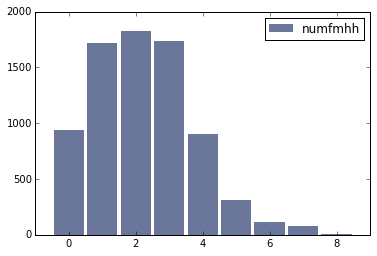

In [5]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

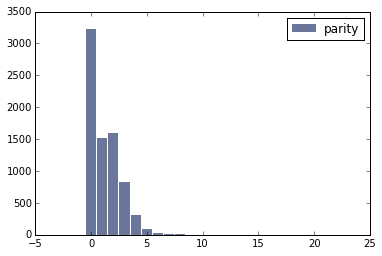

In [6]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show()

# close to half of the respondents have never had children before.

# more women have one or two children compared to higher numbers.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [7]:
hist.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

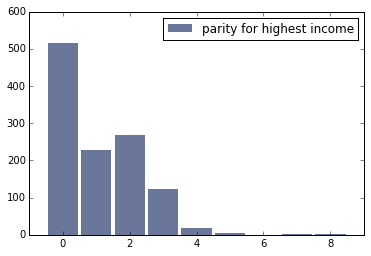

In [8]:
hist = thinkstats2.Hist(resp.parity[resp.totincr == 14])
thinkplot.Hist(hist, label='parity for highest income')
thinkplot.Show()

Find the largest parities for high income respondents.

In [9]:
hist.Largest()

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [10]:
print(resp.parity[resp.totincr == 14].mean(), resp.parity[resp.totincr < 14].mean())

(1.0758620689655172, 1.2495758136665125)


Investigate any other variables that look interesting.

In [11]:
resp.columns

Index([         u'caseid',         u'rscrinf',        u'rdormres',
              u'rostscrn',     u'rscreenhisp',     u'rscreenrace',
                 u'age_a',           u'age_r',         u'cmbirth',
               u'agescrn', 
       ...
            u'pubassis_i',         u'basewgt', u'adj_mod_basewgt',
              u'finalwgt',          u'secu_r',            u'sest',
               u'cmintvw',         u'cmlstyr',      u'screentime',
             u'intvlngth'],
      dtype='object', length=3087)

In [5]:
import chap02ex

In [6]:
hist = thinkstats2.Hist(resp.parity)

print hist.Items()

chap02ex.Mode(hist)

[(0, 3230), (1, 1519), (2, 1603), (3, 828), (4, 309), (5, 95), (6, 29), (7, 15), (8, 8), (9, 2), (10, 3), (16, 1), (22, 1)]


0

In [22]:
chap02ex.AllModes(hist)

[(0, 3230),
 (2, 1603),
 (1, 1519),
 (3, 828),
 (4, 309),
 (5, 95),
 (6, 29),
 (7, 15),
 (8, 8),
 (10, 3),
 (9, 2),
 (16, 1),
 (22, 1)]

In [23]:
import nsfg
df = nsfg.ReadFemPreg()


In [24]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]


In [25]:
print firsts.totalwgt_lb.mean()
print others.totalwgt_lb.mean()

7.20109443044
7.32585561497


In [32]:
import numpy as np

In [33]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [34]:
d = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
print d

-0.0886729270726


In [35]:
d = CohenEffectSize(firsts.prglngth, others.prglngth)
print d

0.0288790446544
